# Importing Libraries and Dataset

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

dataset = pd.read_excel("HousePricePrediction.xlsx")
dataset.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [124]:
dataset.shape

(2919, 13)

In [125]:
dataset.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

# Data Preprocessing

## Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them. 

In [126]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int = (dataset.dtypes == 'int')
num_cols = list(int[int].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 6
Float variables: 3


In [127]:
object_cols

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [128]:
num_cols

['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd']

In [129]:
fl_cols

['BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']

# Exploratory Data Analysis

## let's make a heatmap using seaborn library




<Axes: >

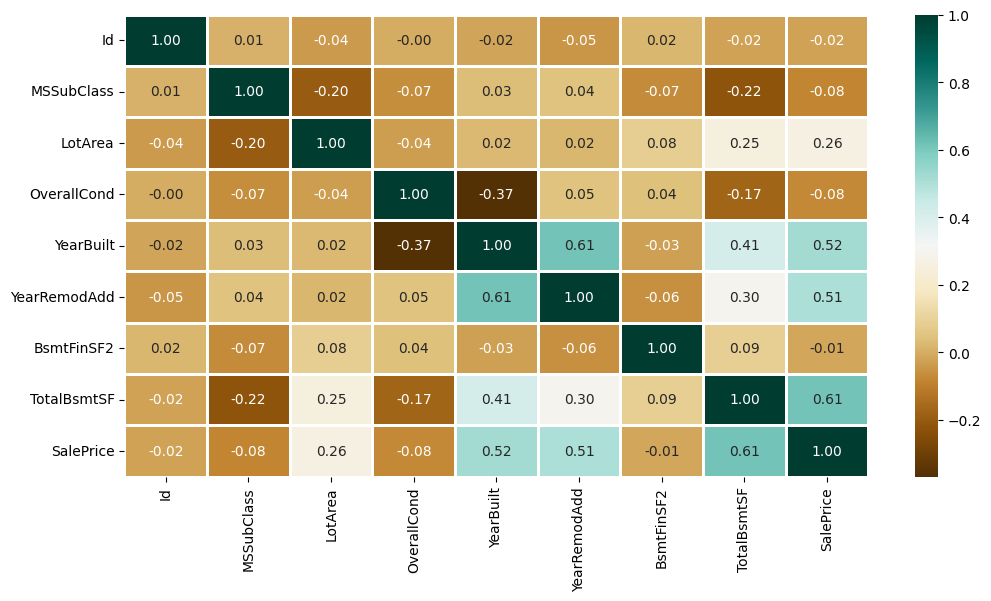

In [130]:
numerical_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

## To analyze the different categorical features. Let's draw the barplot.


<Axes: title={'center': 'No. Unique values of categorical features'}>

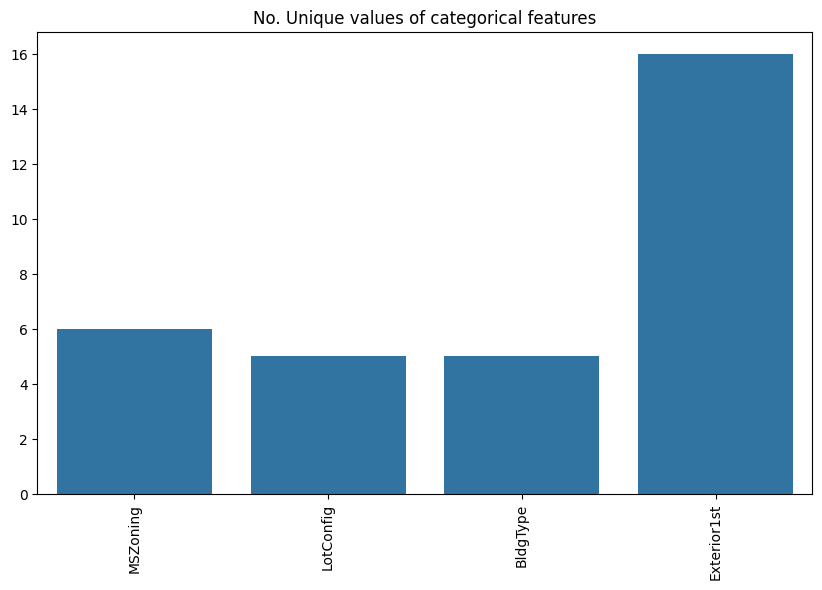

In [131]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of categorical features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories. To findout the actual count of each category we can plot the bargraph of each four features separately.

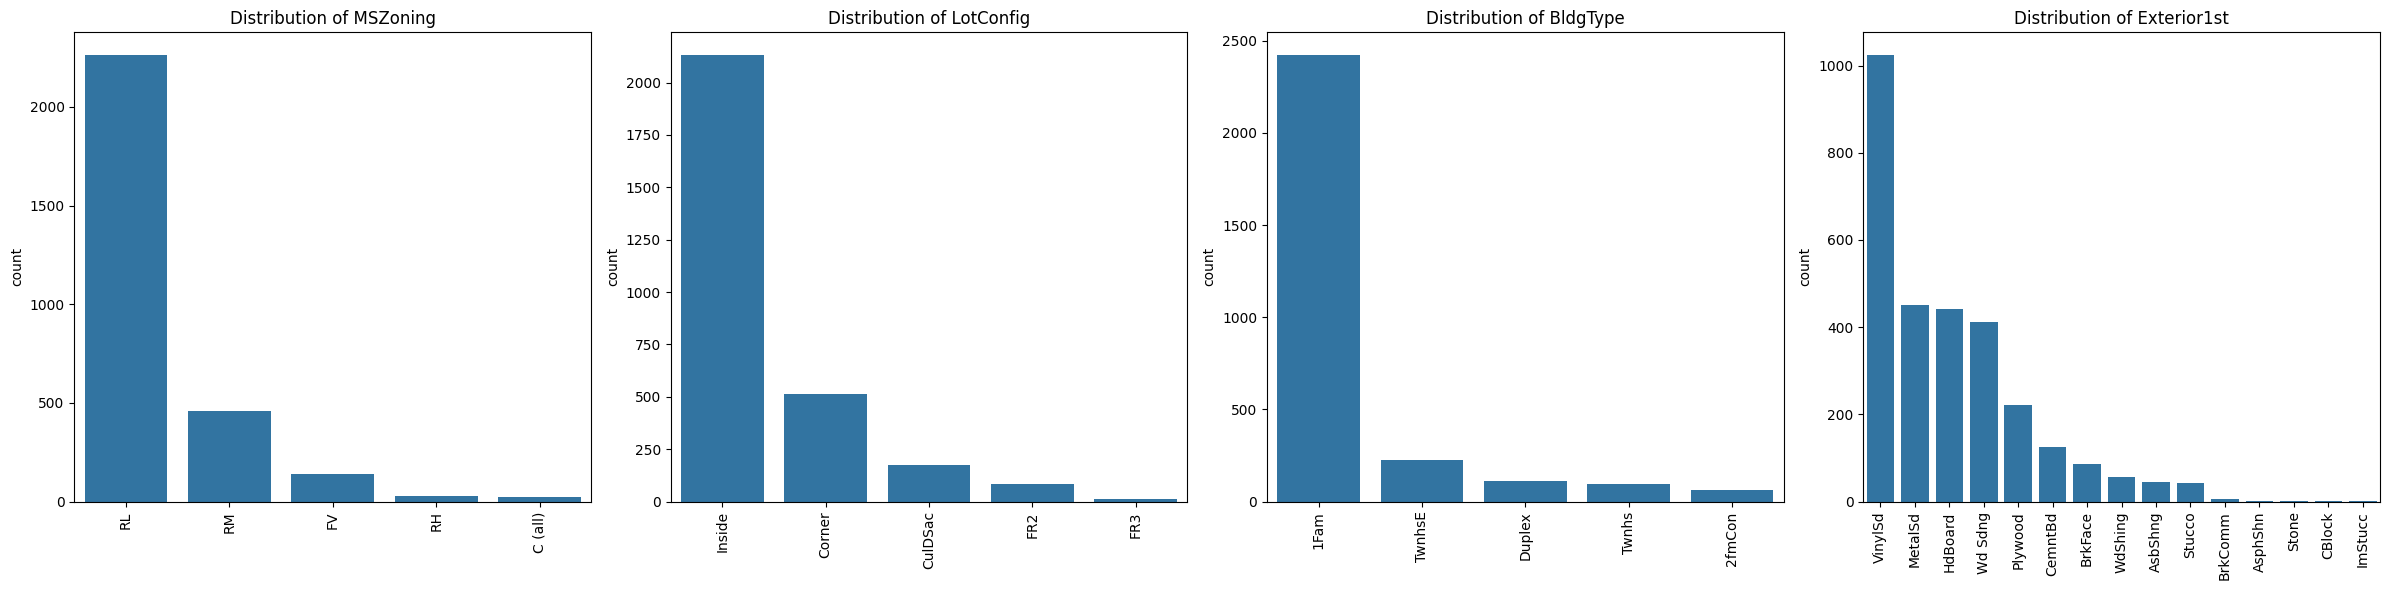

In [132]:
plt.figure(figsize=(24, 6))
index = 1
for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(1, 4, index)
    sns.barplot(x=list(y.index), y=y)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    index += 1

plt.tight_layout()
plt.show()

# Data Cleaning

### Id Column will not be participating in any prediction. So we can Drop it.




In [133]:
dataset.drop(['Id'], axis=1, inplace=True)
dataset.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


### Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

In [134]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())

### Drop records with null values




In [135]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

# OneHotEncoder - For Label categorical features

In [136]:
s = (dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


### Then once we have a list of all the features. We can apply OneHotEncoding to the whole list.

In [137]:
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(enc.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = enc.get_feature_names_out()
df_final = dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [138]:
df_final.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Splitting Dataset into Training and Testing set

In [139]:
x = df_final.drop(['SalePrice'], axis=1)
y = df_final['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Model Training and Accuracy
### SVM-Support Vector Machine, Random Forest Regressor and Linear Regressor

In [140]:
svr = svm.SVR()
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

print(mean_absolute_percentage_error(y_test, y_pred))

0.1870512931870423


In [ ]:

rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

mean_absolute_percentage_error(y_test, y_pred)

In [122]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

mean_absolute_percentage_error(y_test, y_pred)

0.18741683841599896